# *Monod* demonstration: fit to neural cell types

In the current notebook, we run the *Monod* inference pipeline on eight pre-clustered mouse brain cell datasets, disaggregated into GABAergic and glutamatergic cell types, using a common set of 3,000 genes, a $20\times 21$ grid, and four models (bursty, constitutive, extrinsic, and CIR-like).

## Metadata and prerequisites

Define the dataset metadata and disk locations.

In [2]:
dataset_meta = ['A08', 'B01','B08','C01']
cluster_names = ['gaba','glu']
dataset_names = ['allen_'+x+'_'+y for x in dataset_meta for y in cluster_names] 
loom_filepaths = ['/home/ggorin/count_data/loom_allen_celltype_kb/'+x+'.loom' for x in dataset_names] 

transcriptome_filepath = './polyA_ref/gg_200524_mouse_genome_polyA_cum_1'
attribute_names=['spliced','unspliced','gene_name','barcode']

## Preprocessing

Identify the genes to fit.

In [3]:
from preprocess import *

Construct a batch by finding 3,000 genes which have at least moderate expression across all datasets. Visualize the set of genes (purple) that meet the expression filtering criteria.

INFO:root:Beginning data preprocessing and filtering.
INFO:root:Dataset: allen_A08_gaba
INFO:root:730 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:6150 genes retained after expression filter.
INFO:root:Dataset: allen_A08_glu
INFO:root:5010 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:8027 genes retained after expression filter.
INFO:root:Dataset: allen_B01_gaba
INFO:root:765 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:4591 genes retained after expression filter.
INFO:root:Dataset: allen_B01_glu
INFO:root:6494 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:6984 genes retained after expression filter.
INFO:root:Dataset: allen_B08_gaba
INFO:root:855 cells detected.
INFO:root:32285 features observed, 32005 match genome annotati

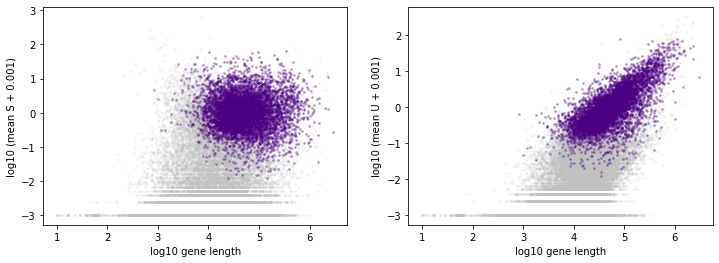

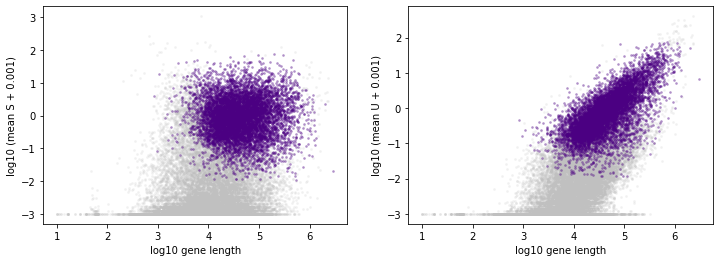

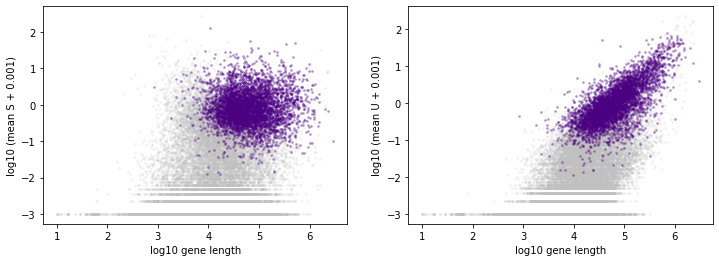

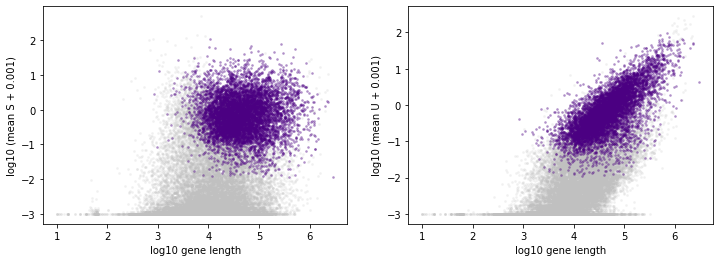

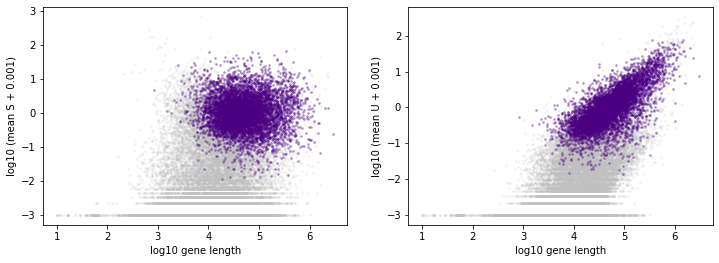

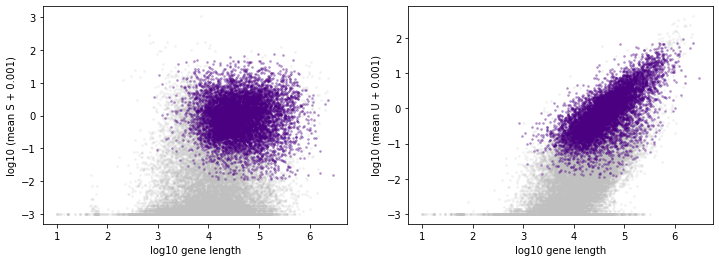

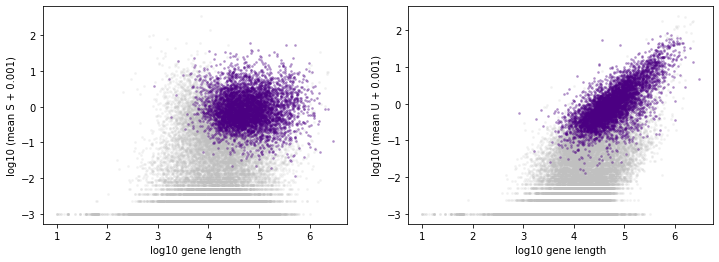

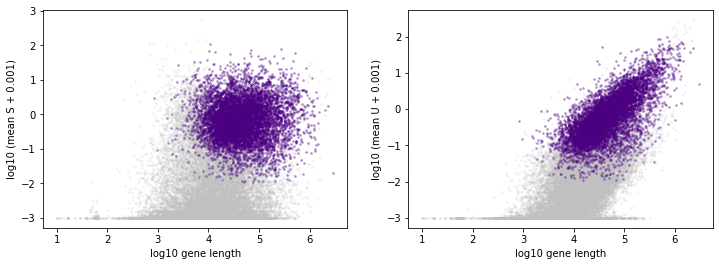

In [6]:
dir_string,dataset_strings = construct_batch(loom_filepaths, \
                                             transcriptome_filepath, \
                                             dataset_names, \
                                             attribute_names=attribute_names,\
                                             batch_location='./fits',meta='allen_celltypes',batch_id=1,\
                                             n_genes=3000)

In [4]:
from extract_data import extract_data

Load in the remaining dependencies.

In [5]:
import cme_toolbox
from cme_toolbox import CMEModel
import inference
from inference import InferenceParameters, GradientInference
import analysis 
from analysis import *

Define the models to analyze.

In [7]:
models = ('Bursty','Constitutive','Extrinsic','CIR')

In [8]:
n_models = len(models)

## Inference

Define parameter bounds, then iterate over datasets and models and perform the fits.

In [ ]:
lb = [[-1.0, -1.8, -1.8 ],
      [-1.0, -1.0 ],
      [-1.0, -1.8, -1.8 ],
      [-1.0, -1.8, -1.8 ]]
ub = [[4.2, 2.5, 3.5],
      [3.5, 3.5],
      [4.2, 2.5, 3.5],
      [4.2, 2.5, 3.5]]
grid = [20,21]

result_strings = []
for i in range(n_datasets):
    for j in range(len(models)):
        fitmodel = CMEModel(models[j],'Poisson')
        print(models[j])
        inference_parameters = InferenceParameters(lb[j],ub[j],[-8, -3],[-5, 0],grid,\
                    dataset_strings[i],fitmodel,use_lengths = True,
                    gradient_params = {'max_iterations':10,'init_pattern':'moments','num_restarts':1})
        if j==0:
            search_data = extract_data(loom_filepaths[i], transcriptome_filepath, dataset_names[i],
                                dataset_strings[i], dir_string, dataset_attr_names=attribute_names)
        else:
            search_data = load_search_data(dataset_strings[i]+'/raw.sd')
        full_result_string = inference_parameters.fit_all_grid_points(50,search_data)
        result_strings.append(full_result_string)

Bursty
INFO:root:Directory ./fits/gg_220527_021_allen_celltypes_1/allen_A08_glu/Bursty_Poisson_20x21 created.
INFO:root:Global inference parameters stored to ./fits/gg_220527_021_allen_celltypes_1/allen_A08_glu/Bursty_Poisson_20x21/parameters.pr.
INFO:root:Beginning data extraction.
INFO:root:Dataset: allen_A08_glu
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:Gene list extracted from ./fits/gg_220527_021_allen_celltypes_1/genes.csv.
INFO:root:Directory ./fits/gg_220527_021_allen_celltypes_1/allen_A08_glu/diagnostic_figures created.
INFO:root:Search data stored to ./fits/gg_220527_021_allen_celltypes_1/allen_A08_glu/raw.sd.
INFO:root:Starting parallelized grid scan.
INFO:root:Parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory ./fits/gg_220527_021_allen_celltypes_1/allen_A08_glu/Bursty_Poisson_20x21/analysis_figures created.
INFO:root:Runtime: 21106.9 seconds.
Constitutive
INFO:root:Dire

INFO:root:Search data loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_B01_glu/raw.sd.
INFO:root:Starting parallelized grid scan.


In [9]:
dir_string = './fits/gg_220527_021_allen_celltypes_1'
sd_strings = [dir_string+'/'+x+'/raw.sd' for x in dataset_names]
sd_arr = [load_search_data(x) for x in sd_strings]


INFO:root:Search data loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_A08_gaba/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_A08_glu/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_B01_gaba/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_B01_glu/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_B08_gaba/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_B08_glu/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_C01_gaba/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_C01_glu/raw.sd.


Select the result strings corresponding to the bursty model, which will be used for differential regulation analysis.

In [10]:
result_strings = [dir_string+'/'+x+'/Bursty_Poisson_20x21/grid_scan_results.res' for x in dataset_names]
n_datasets = len(result_strings)

In [11]:
result_strings

['./fits/gg_220527_021_allen_celltypes_1/allen_A08_gaba/Bursty_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220527_021_allen_celltypes_1/allen_A08_glu/Bursty_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220527_021_allen_celltypes_1/allen_B01_gaba/Bursty_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220527_021_allen_celltypes_1/allen_B01_glu/Bursty_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220527_021_allen_celltypes_1/allen_B08_gaba/Bursty_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220527_021_allen_celltypes_1/allen_B08_glu/Bursty_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220527_021_allen_celltypes_1/allen_C01_gaba/Bursty_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220527_021_allen_celltypes_1/allen_C01_glu/Bursty_Poisson_20x21/grid_scan_results.res']

## Post-processing and QC

Now, we iterate over the results for the bursty model, identify the parameter optima, and compute conditional standard error. We visually inspect the results for each dataset and find that the results accord with expectations, and tend to be consistent across the cell types, tissues, and mice.

In [12]:
sr_arr = []
j=0

INFO:root:Grid scan results loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_A08_gaba/Bursty_Poisson_20x21/grid_scan_results.res.
INFO:root:No rejection statistics have been computed.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_A08_gaba/Bursty_Poisson_20x21/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_A08_gaba/Bursty_Poisson_20x21/analysis_figures/gene_distributions_joint.png.
INFO:root:Chi-square computation complete. Rejected 58 genes out of 3000. Runtime: 3.5 seconds.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_A08_gaba/Bursty_Poisson_20x21/analysis_figures/subsampling.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_A08_gaba/Bursty_Poisson_20x21/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -6.26, -0.75.
INFO:root:Chi-square computation complete. Rejected 58 genes out of 3000. Runtime: 3.4 seconds.
INFO:root:New

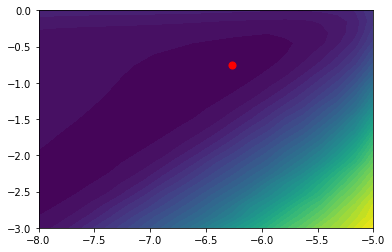

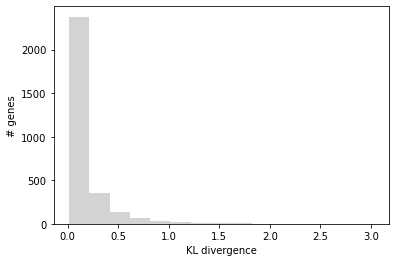

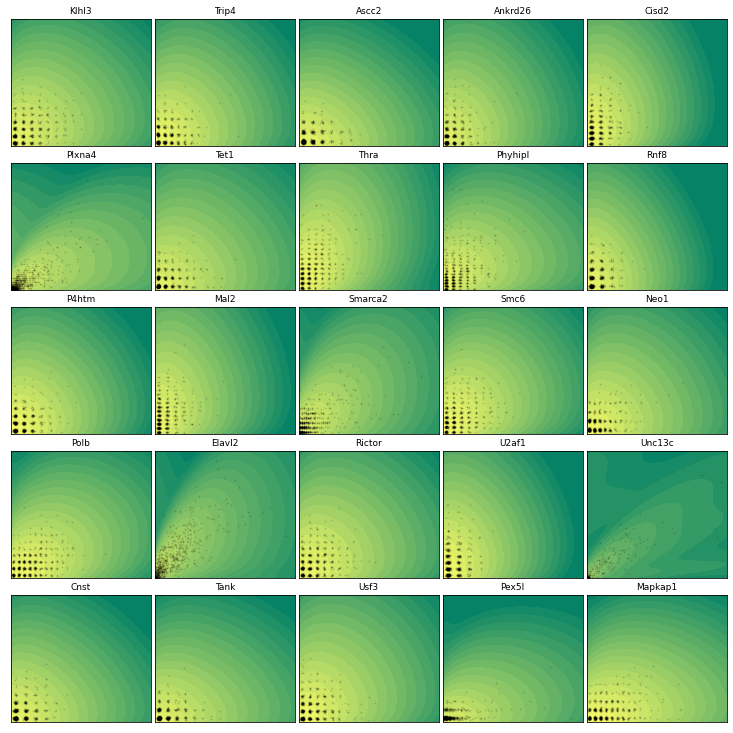

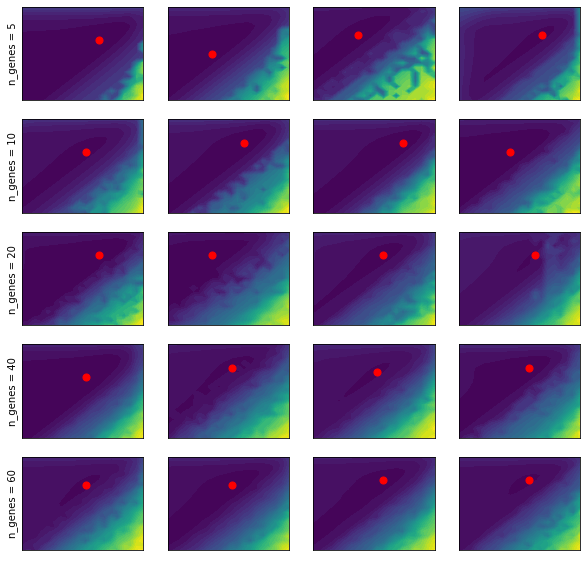

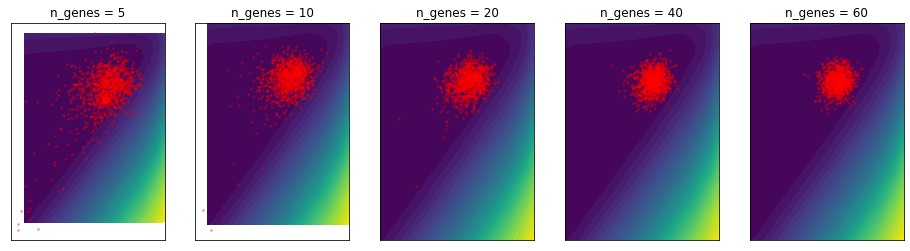

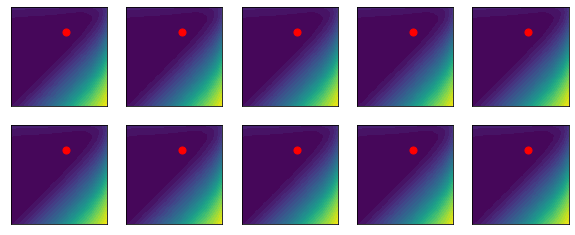

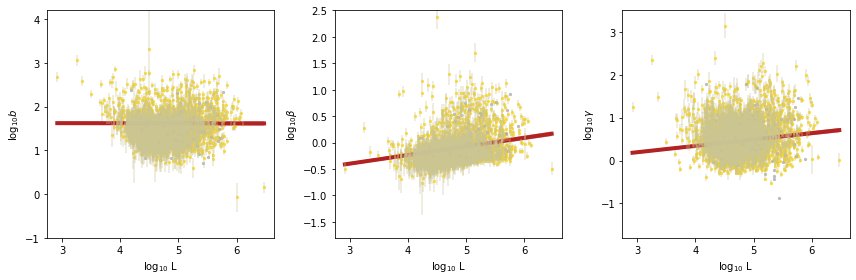

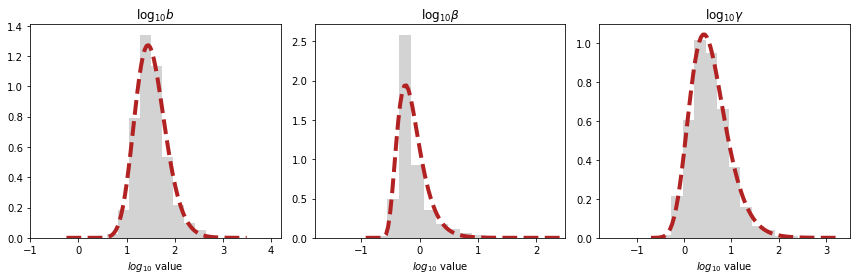

In [18]:
sr = load_search_results(result_strings[j])
sd = sd_arr[j]
fig1,ax1 = plt.subplots(1,1)
sr.find_sampling_optimum()
sr.plot_landscape(ax1)



fig1,ax1 = plt.subplots(1,1)
sr.plot_KL(ax1)

sr.plot_gene_distributions(sd,marg='joint')

_=sr.chisquare_testing(sd)
sr.resample_opt_viz()
sr.resample_opt_mc_viz()
sr.chisq_best_param_correction(sd,viz=True) 

sr.compute_sigma(sd,num_cores=50)
sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
sr.plot_param_marg()
sr.update_on_disk()
sr_arr.append(sr)

j+=1

INFO:root:Grid scan results loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_A08_glu/Bursty_Poisson_20x21/grid_scan_results.res.
INFO:root:No rejection statistics have been computed.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_A08_glu/Bursty_Poisson_20x21/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_A08_glu/Bursty_Poisson_20x21/analysis_figures/gene_distributions_joint.png.


/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


INFO:root:Chi-square computation complete. Rejected 119 genes out of 3000. Runtime: 4.3 seconds.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_A08_glu/Bursty_Poisson_20x21/analysis_figures/subsampling.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_A08_glu/Bursty_Poisson_20x21/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -6.26, -0.90.
INFO:root:Chi-square computation complete. Rejected 119 genes out of 3000. Runtime: 4.2 seconds.
INFO:root:New optimum: -6.26, -0.90.
INFO:root:Chi-square computation complete. Rejected 119 genes out of 3000. Runtime: 4.2 seconds.
INFO:root:New optimum: -6.26, -0.90.
INFO:root:Chi-square computation complete. Rejected 119 genes out of 3000. Runtime: 4.2 seconds.
INFO:root:New optimum: -6.26, -0.90.
INFO:root:Chi-square computation complete. Rejected 119 genes out of 3000. Runtime: 4.2 seconds.
INFO:root:New optimum: -6.26, -0.90.
INFO:root:Chi-square computation complete. Re

/home/ggorin/projects/seq-cme-technoise/inference.py:803: RuntimeWarning: invalid value encountered in sqrt
  except:


INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_A08_glu/Bursty_Poisson_20x21/analysis_figures/length_dependence.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_A08_glu/Bursty_Poisson_20x21/analysis_figures/parameter_marginals.png.


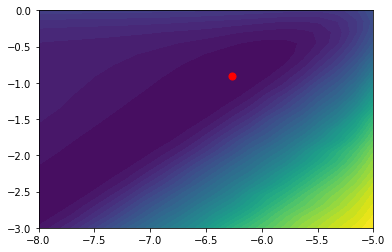

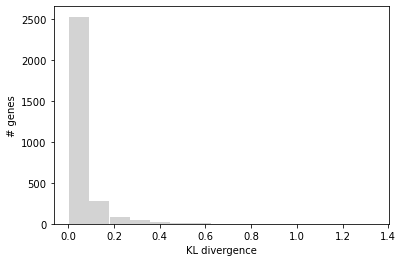

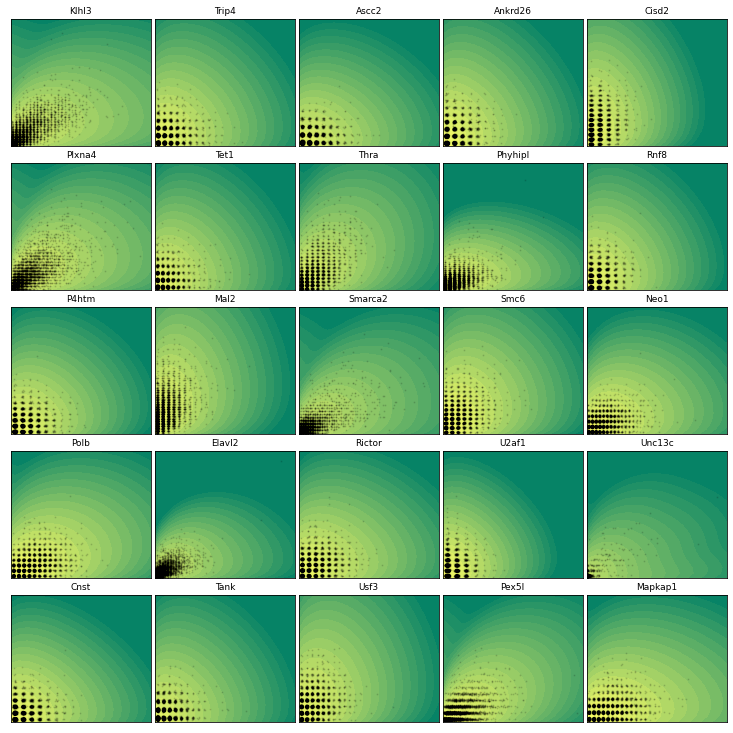

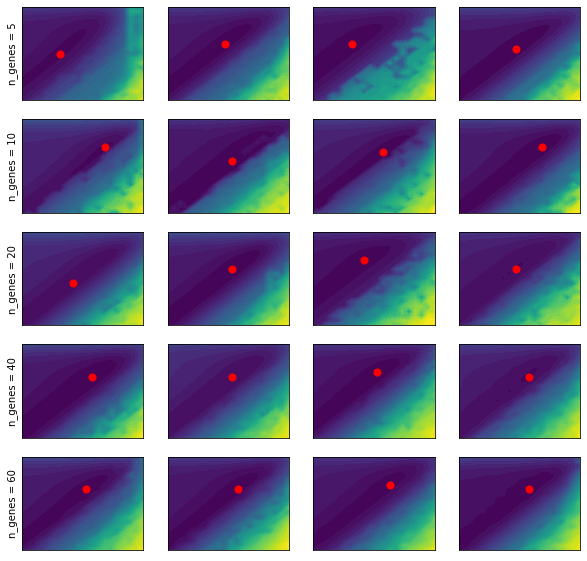

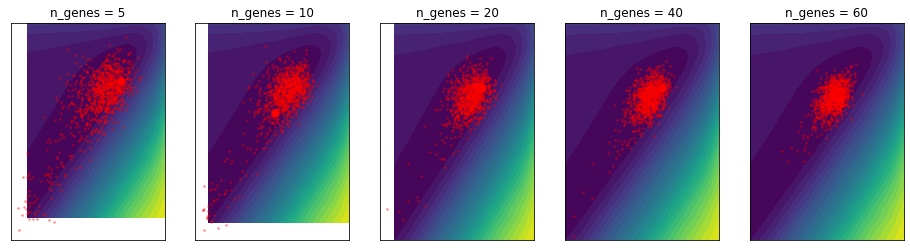

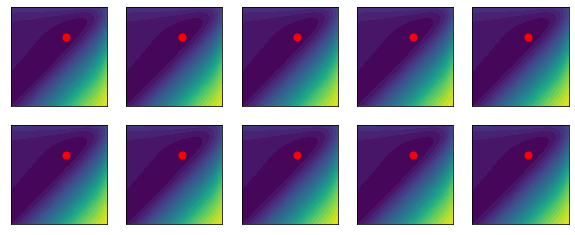

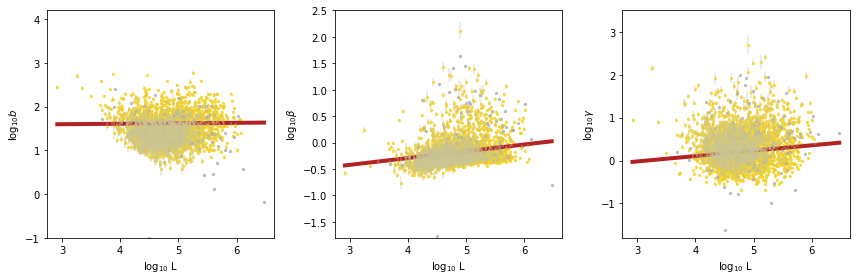

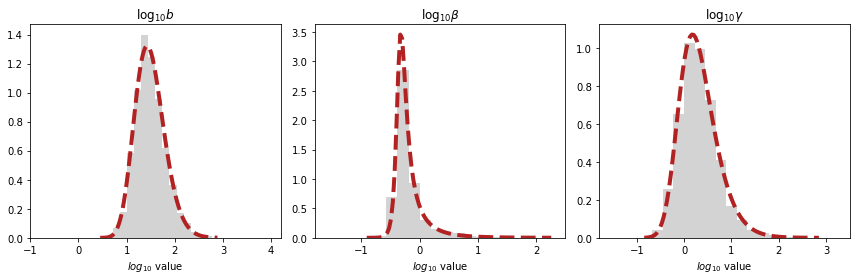

In [21]:
sr = load_search_results(result_strings[j])
sd = sd_arr[j]
fig1,ax1 = plt.subplots(1,1)
sr.find_sampling_optimum()
sr.plot_landscape(ax1)



fig1,ax1 = plt.subplots(1,1)
sr.plot_KL(ax1)

sr.plot_gene_distributions(sd,marg='joint')

_=sr.chisquare_testing(sd)
sr.resample_opt_viz()
sr.resample_opt_mc_viz()
sr.chisq_best_param_correction(sd,viz=True) 

sr.compute_sigma(sd,num_cores=50)
sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
sr.plot_param_marg()
sr.update_on_disk()
sr_arr.append(sr)

j+=1

INFO:root:Grid scan results loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_B01_gaba/Bursty_Poisson_20x21/grid_scan_results.res.
INFO:root:No rejection statistics have been computed.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B01_gaba/Bursty_Poisson_20x21/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B01_gaba/Bursty_Poisson_20x21/analysis_figures/gene_distributions_joint.png.


/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


INFO:root:Chi-square computation complete. Rejected 74 genes out of 3000. Runtime: 2.4 seconds.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B01_gaba/Bursty_Poisson_20x21/analysis_figures/subsampling.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B01_gaba/Bursty_Poisson_20x21/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -6.26, -0.75.
INFO:root:Chi-square computation complete. Rejected 74 genes out of 3000. Runtime: 2.3 seconds.
INFO:root:New optimum: -6.26, -0.75.
INFO:root:Chi-square computation complete. Rejected 74 genes out of 3000. Runtime: 2.3 seconds.
INFO:root:New optimum: -6.26, -0.75.
INFO:root:Chi-square computation complete. Rejected 74 genes out of 3000. Runtime: 2.3 seconds.
INFO:root:New optimum: -6.26, -0.75.
INFO:root:Chi-square computation complete. Rejected 74 genes out of 3000. Runtime: 2.3 seconds.
INFO:root:New optimum: -6.26, -0.75.
INFO:root:Chi-square computation complete. Rejec

/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4154: RuntimeWarning: overflow encountered in exp
  fac1 = a / np.pi * np.exp(gamma)
/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4154: RuntimeWarning: overflow encountered in double_scalars
  fac1 = a / np.pi * np.exp(gamma)


INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B01_gaba/Bursty_Poisson_20x21/analysis_figures/parameter_marginals.png.


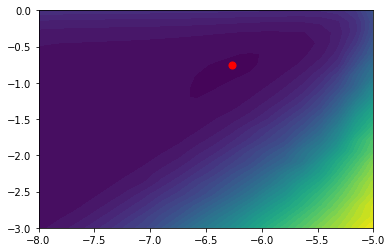

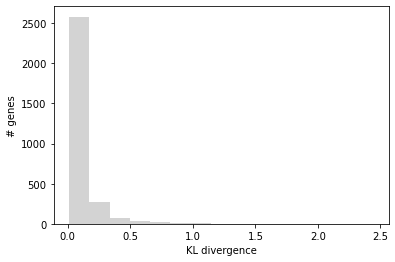

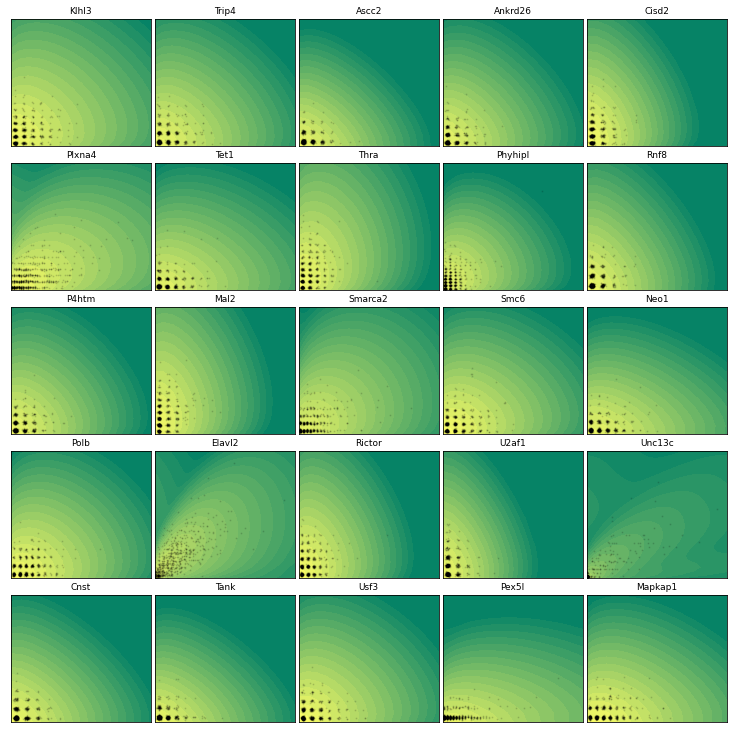

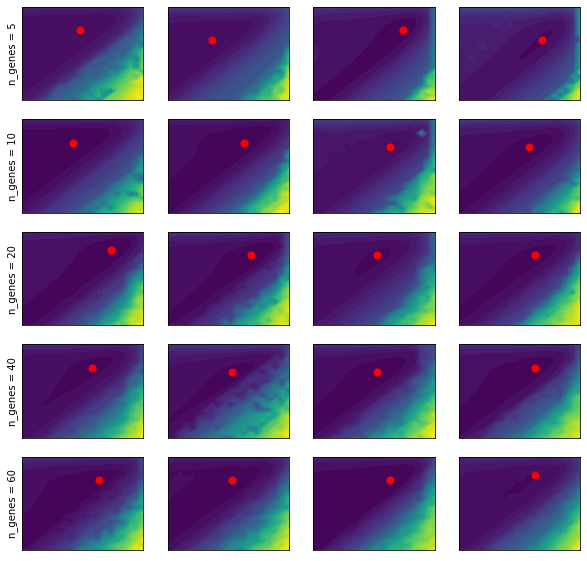

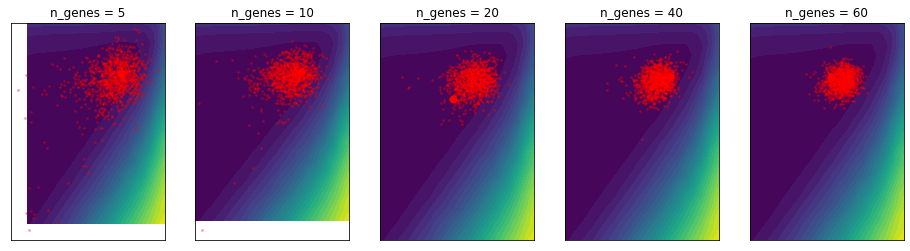

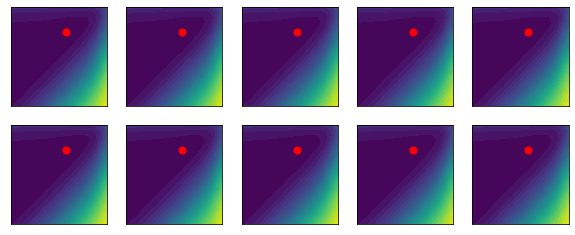

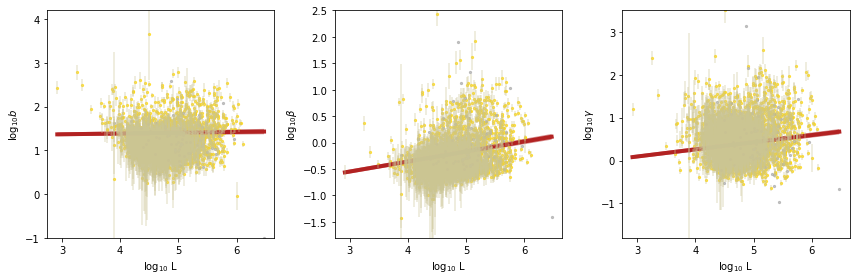

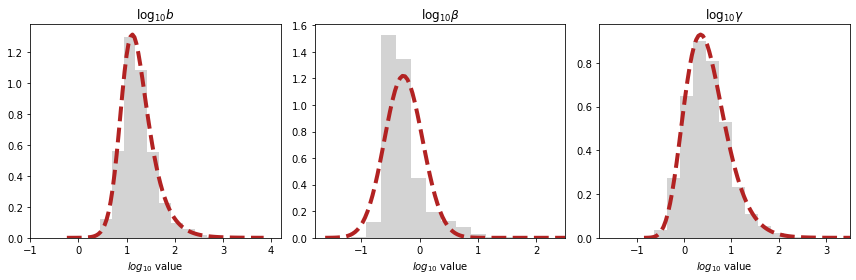

In [22]:
sr = load_search_results(result_strings[j])
sd = sd_arr[j]
fig1,ax1 = plt.subplots(1,1)
sr.find_sampling_optimum()
sr.plot_landscape(ax1)



fig1,ax1 = plt.subplots(1,1)
sr.plot_KL(ax1)

sr.plot_gene_distributions(sd,marg='joint')

_=sr.chisquare_testing(sd)
sr.resample_opt_viz()
sr.resample_opt_mc_viz()
sr.chisq_best_param_correction(sd,viz=True) 

sr.compute_sigma(sd,num_cores=50)
sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
sr.plot_param_marg()
sr.update_on_disk()
sr_arr.append(sr)

j+=1

INFO:root:Grid scan results loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_B01_glu/Bursty_Poisson_20x21/grid_scan_results.res.
INFO:root:No rejection statistics have been computed.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B01_glu/Bursty_Poisson_20x21/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B01_glu/Bursty_Poisson_20x21/analysis_figures/gene_distributions_joint.png.


/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


INFO:root:Chi-square computation complete. Rejected 116 genes out of 3000. Runtime: 2.9 seconds.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B01_glu/Bursty_Poisson_20x21/analysis_figures/subsampling.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B01_glu/Bursty_Poisson_20x21/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -6.26, -0.90.
INFO:root:Chi-square computation complete. Rejected 116 genes out of 3000. Runtime: 2.9 seconds.
INFO:root:New optimum: -6.26, -0.90.
INFO:root:Chi-square computation complete. Rejected 116 genes out of 3000. Runtime: 2.8 seconds.
INFO:root:New optimum: -6.26, -0.90.
INFO:root:Chi-square computation complete. Rejected 116 genes out of 3000. Runtime: 2.9 seconds.
INFO:root:New optimum: -6.26, -0.90.
INFO:root:Chi-square computation complete. Rejected 116 genes out of 3000. Runtime: 2.8 seconds.
INFO:root:New optimum: -6.26, -0.90.
INFO:root:Chi-square computation complete. Re

/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4154: RuntimeWarning: overflow encountered in exp
  fac1 = a / np.pi * np.exp(gamma)
/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4156: RuntimeWarning: invalid value encountered in multiply
  return fac1 * sc.k1e(a * sq) * np.exp(b*x - a*sq) / sq
/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4154: RuntimeWarning: overflow encountered in double_scalars
  fac1 = a / np.pi * np.exp(gamma)


INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B01_glu/Bursty_Poisson_20x21/analysis_figures/parameter_marginals.png.


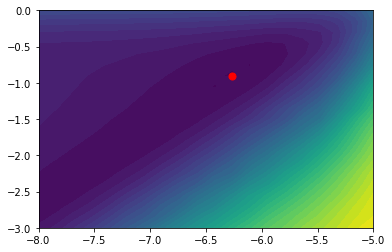

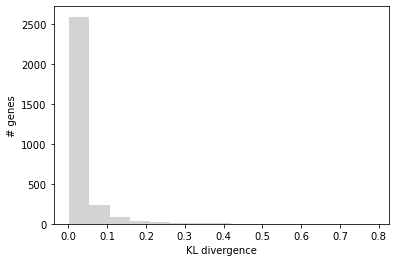

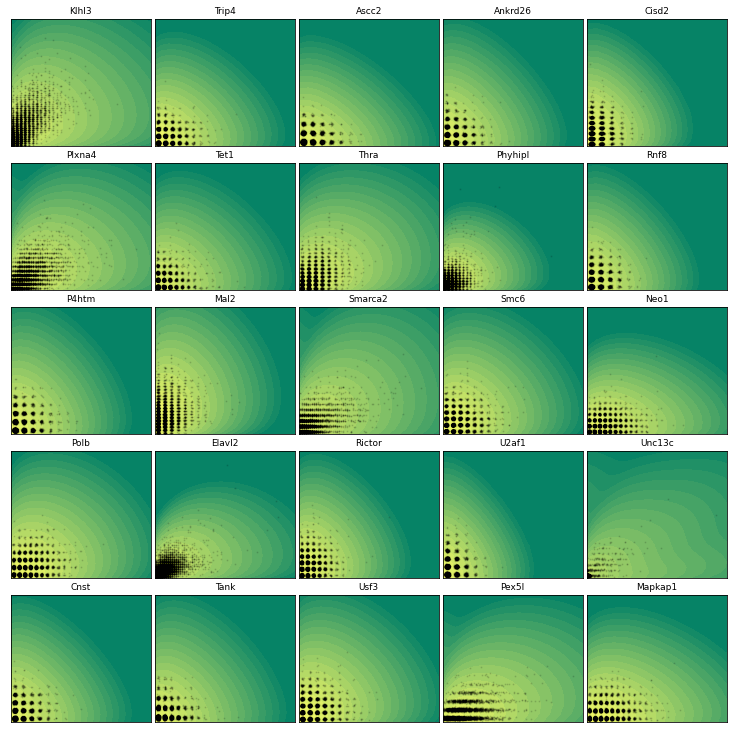

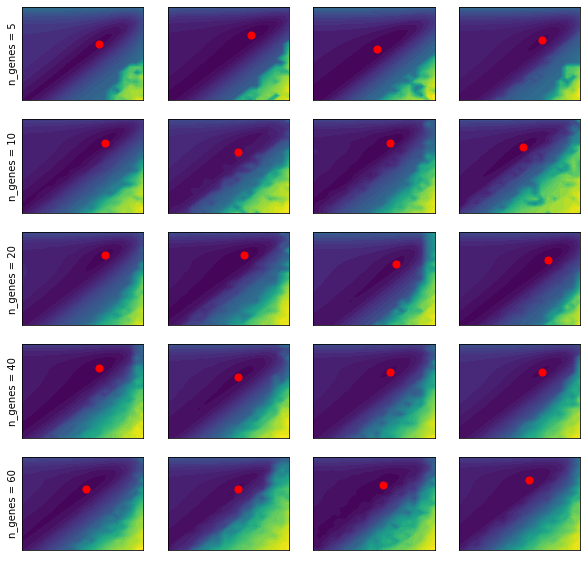

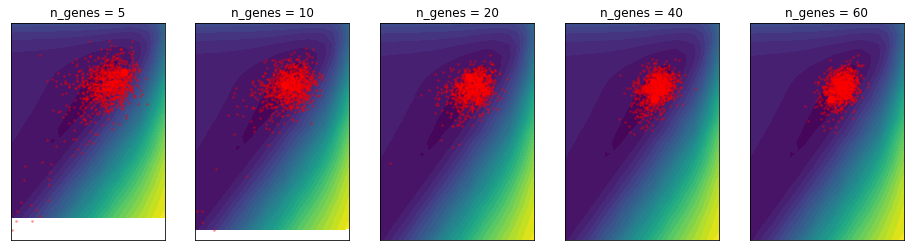

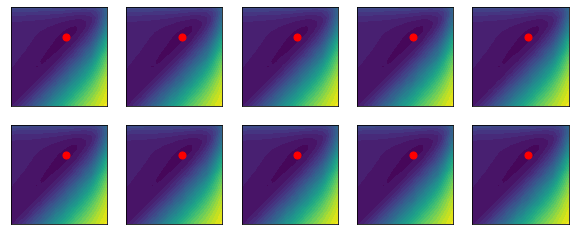

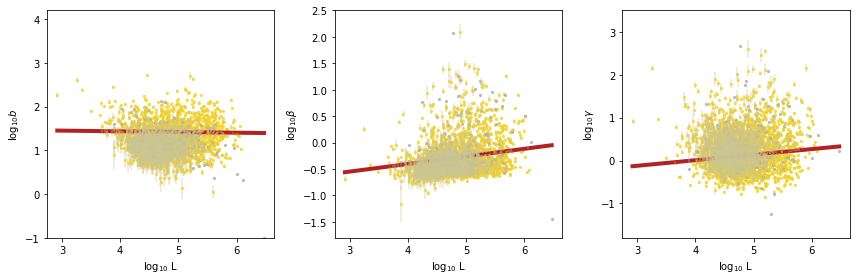

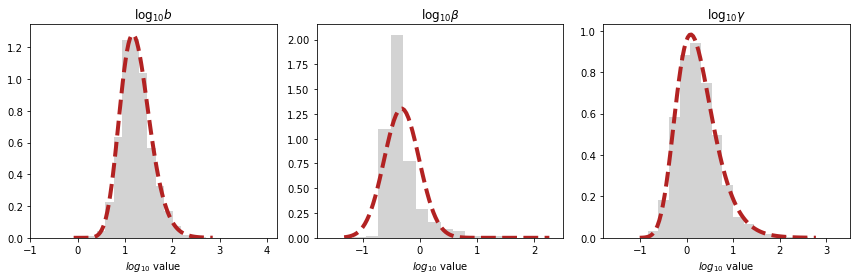

In [23]:
sr = load_search_results(result_strings[j])
sd = sd_arr[j]
fig1,ax1 = plt.subplots(1,1)
sr.find_sampling_optimum()
sr.plot_landscape(ax1)



fig1,ax1 = plt.subplots(1,1)
sr.plot_KL(ax1)

sr.plot_gene_distributions(sd,marg='joint')

_=sr.chisquare_testing(sd)
sr.resample_opt_viz()
sr.resample_opt_mc_viz()
sr.chisq_best_param_correction(sd,viz=True) 

sr.compute_sigma(sd,num_cores=50)
sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
sr.plot_param_marg()
sr.update_on_disk()
sr_arr.append(sr)

j+=1

INFO:root:Grid scan results loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_B08_gaba/Bursty_Poisson_20x21/grid_scan_results.res.
INFO:root:No rejection statistics have been computed.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B08_gaba/Bursty_Poisson_20x21/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B08_gaba/Bursty_Poisson_20x21/analysis_figures/gene_distributions_joint.png.


/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


INFO:root:Chi-square computation complete. Rejected 45 genes out of 3000. Runtime: 3.7 seconds.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B08_gaba/Bursty_Poisson_20x21/analysis_figures/subsampling.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B08_gaba/Bursty_Poisson_20x21/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -6.26, -0.75.
INFO:root:Chi-square computation complete. Rejected 45 genes out of 3000. Runtime: 3.4 seconds.
INFO:root:New optimum: -6.26, -0.75.
INFO:root:Chi-square computation complete. Rejected 45 genes out of 3000. Runtime: 3.4 seconds.
INFO:root:New optimum: -6.26, -0.75.
INFO:root:Chi-square computation complete. Rejected 45 genes out of 3000. Runtime: 3.4 seconds.
INFO:root:New optimum: -6.26, -0.75.
INFO:root:Chi-square computation complete. Rejected 45 genes out of 3000. Runtime: 3.4 seconds.
INFO:root:New optimum: -6.26, -0.75.
INFO:root:Chi-square computation complete. Rejec

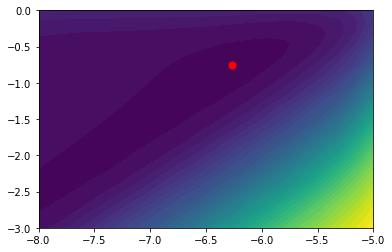

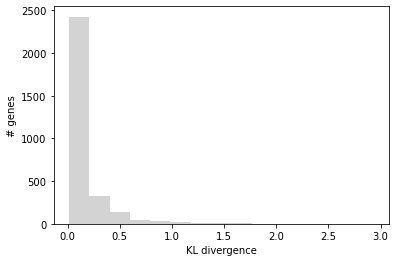

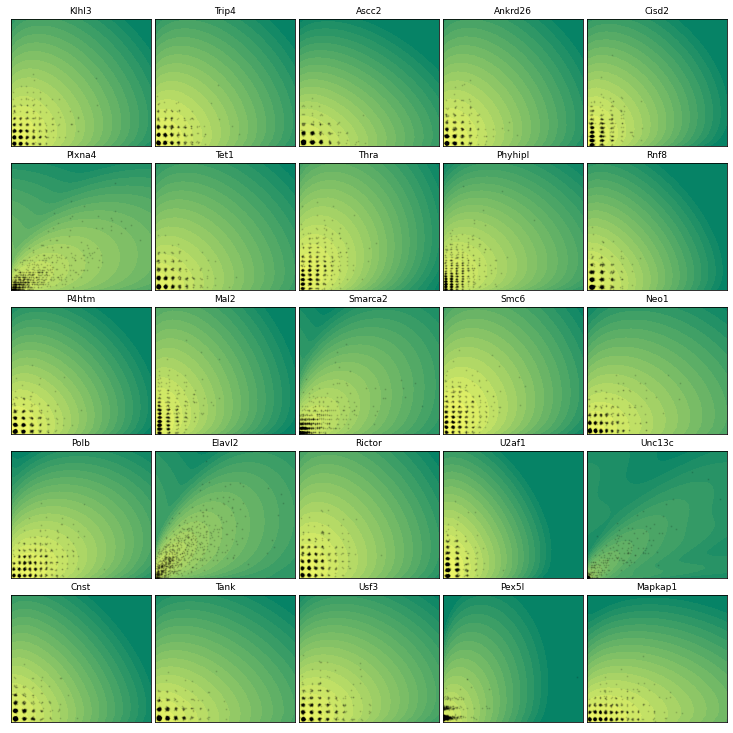

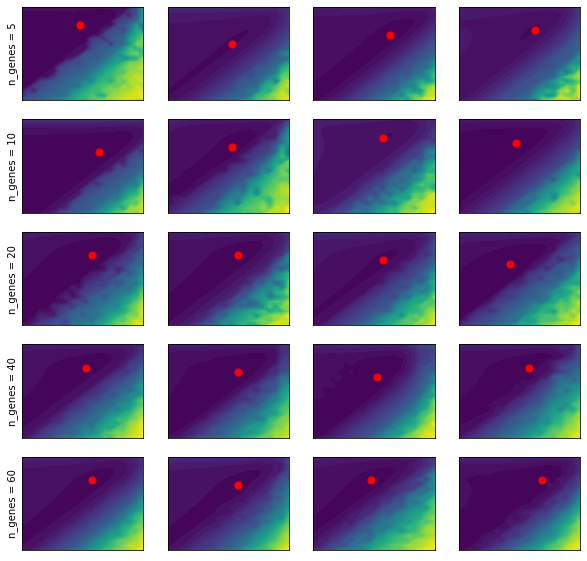

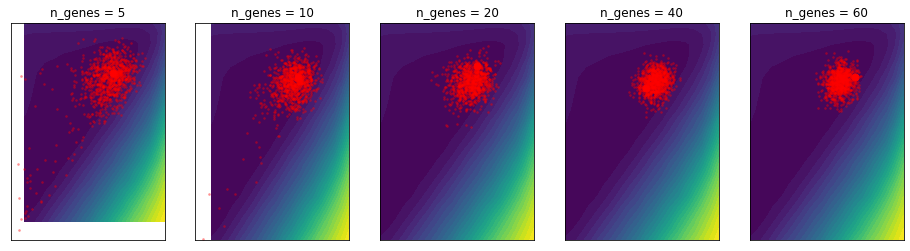

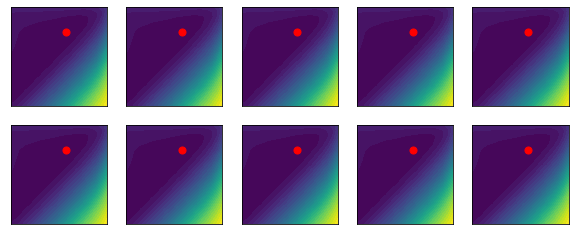

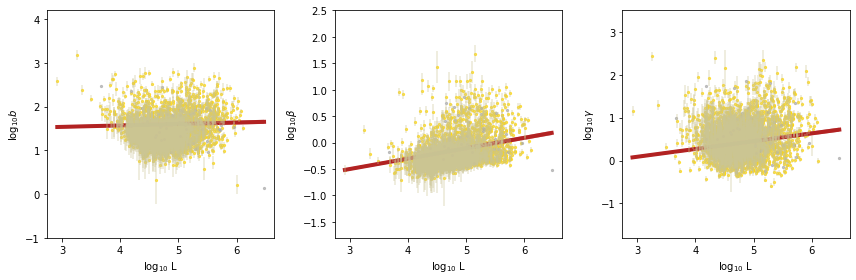

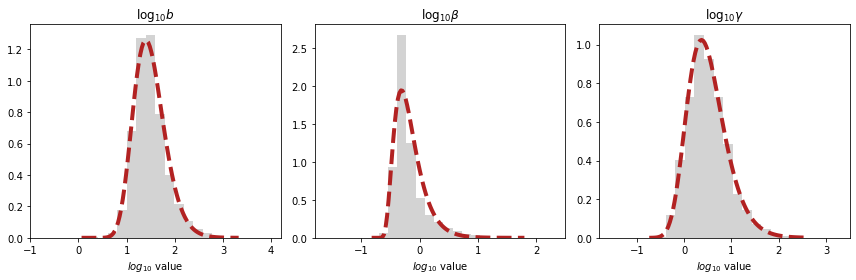

In [24]:
sr = load_search_results(result_strings[j])
sd = sd_arr[j]
fig1,ax1 = plt.subplots(1,1)
sr.find_sampling_optimum()
sr.plot_landscape(ax1)



fig1,ax1 = plt.subplots(1,1)
sr.plot_KL(ax1)

sr.plot_gene_distributions(sd,marg='joint')

_=sr.chisquare_testing(sd)
sr.resample_opt_viz()
sr.resample_opt_mc_viz()
sr.chisq_best_param_correction(sd,viz=True) 

sr.compute_sigma(sd,num_cores=50)
sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
sr.plot_param_marg()
sr.update_on_disk()
sr_arr.append(sr)

j+=1

INFO:root:Grid scan results loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_B08_glu/Bursty_Poisson_20x21/grid_scan_results.res.
INFO:root:No rejection statistics have been computed.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B08_glu/Bursty_Poisson_20x21/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B08_glu/Bursty_Poisson_20x21/analysis_figures/gene_distributions_joint.png.


/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


INFO:root:Chi-square computation complete. Rejected 137 genes out of 3000. Runtime: 4.3 seconds.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B08_glu/Bursty_Poisson_20x21/analysis_figures/subsampling.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_B08_glu/Bursty_Poisson_20x21/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -6.26, -1.05.
INFO:root:Chi-square computation complete. Rejected 137 genes out of 3000. Runtime: 4.2 seconds.
INFO:root:New optimum: -6.26, -1.05.
INFO:root:Chi-square computation complete. Rejected 137 genes out of 3000. Runtime: 4.2 seconds.
INFO:root:New optimum: -6.26, -1.05.
INFO:root:Chi-square computation complete. Rejected 137 genes out of 3000. Runtime: 4.2 seconds.
INFO:root:New optimum: -6.26, -1.05.
INFO:root:Chi-square computation complete. Rejected 137 genes out of 3000. Runtime: 4.2 seconds.
INFO:root:New optimum: -6.26, -1.05.
INFO:root:Chi-square computation complete. Re

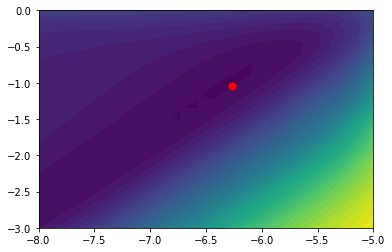

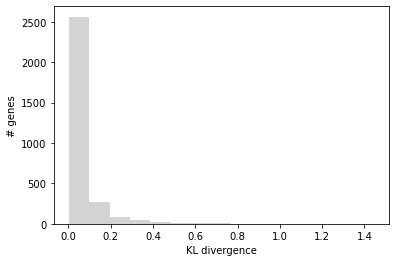

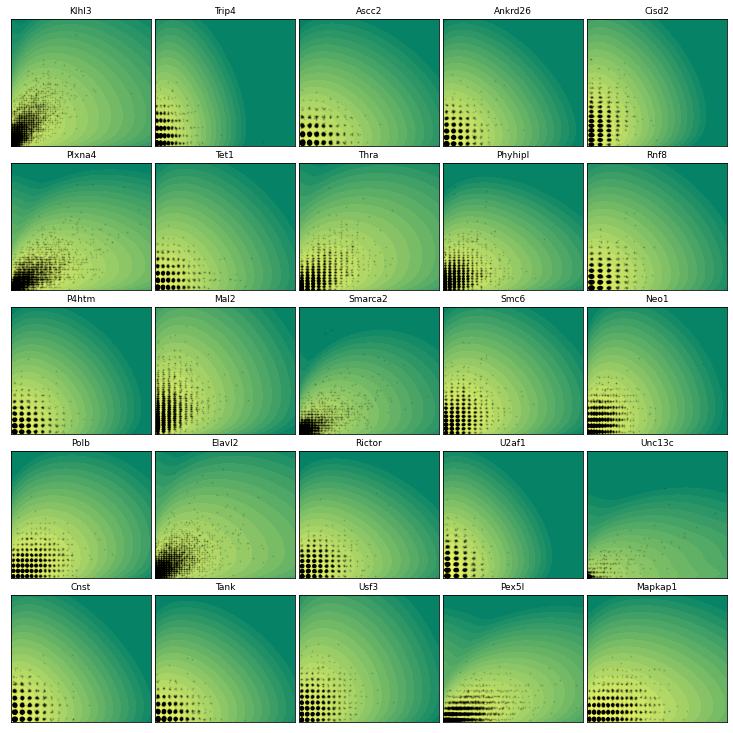

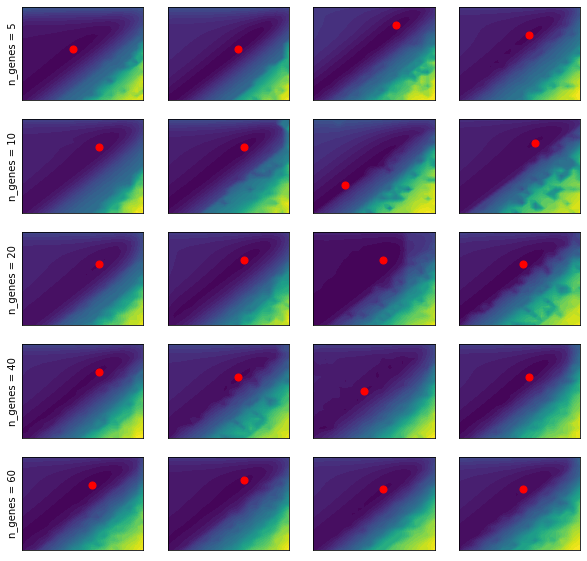

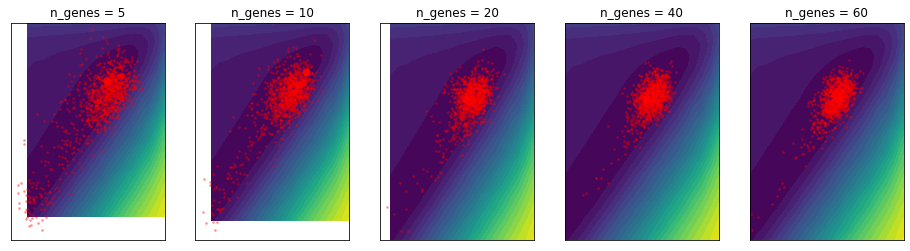

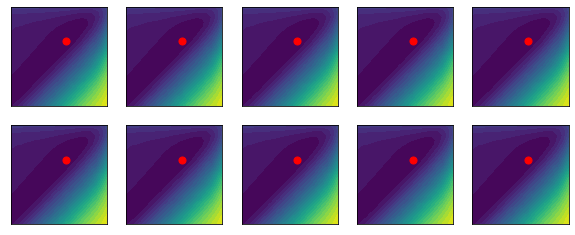

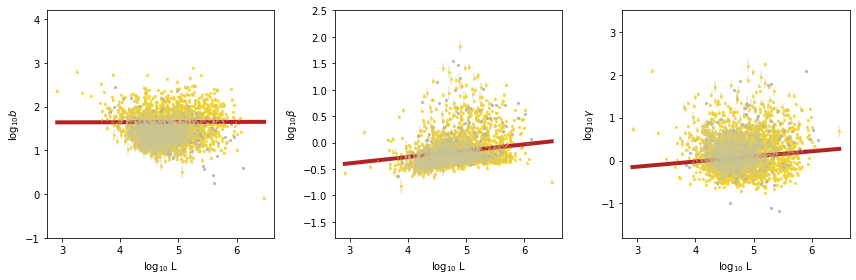

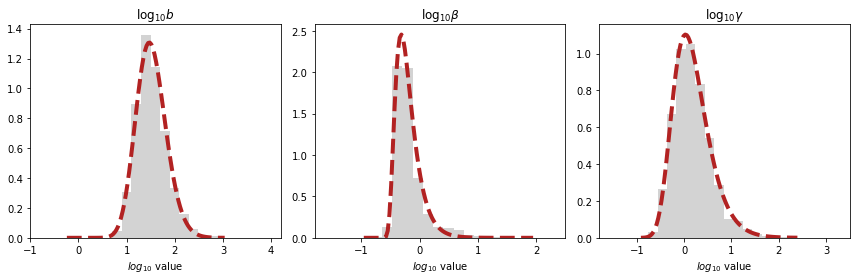

In [25]:
sr = load_search_results(result_strings[j])
sd = sd_arr[j]
fig1,ax1 = plt.subplots(1,1)
sr.find_sampling_optimum()
sr.plot_landscape(ax1)



fig1,ax1 = plt.subplots(1,1)
sr.plot_KL(ax1)

sr.plot_gene_distributions(sd,marg='joint')

_=sr.chisquare_testing(sd)
sr.resample_opt_viz()
sr.resample_opt_mc_viz()
sr.chisq_best_param_correction(sd,viz=True) 

sr.compute_sigma(sd,num_cores=50)
sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
sr.plot_param_marg()
sr.update_on_disk()
sr_arr.append(sr)

j+=1

INFO:root:Grid scan results loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_C01_gaba/Bursty_Poisson_20x21/grid_scan_results.res.
INFO:root:No rejection statistics have been computed.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_C01_gaba/Bursty_Poisson_20x21/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_C01_gaba/Bursty_Poisson_20x21/analysis_figures/gene_distributions_joint.png.


/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


INFO:root:Chi-square computation complete. Rejected 35 genes out of 3000. Runtime: 2.4 seconds.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_C01_gaba/Bursty_Poisson_20x21/analysis_figures/subsampling.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_C01_gaba/Bursty_Poisson_20x21/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -6.11, -0.75.
INFO:root:Chi-square computation complete. Rejected 35 genes out of 3000. Runtime: 2.6 seconds.
INFO:root:New optimum: -6.11, -0.75.
INFO:root:Chi-square computation complete. Rejected 35 genes out of 3000. Runtime: 2.4 seconds.
INFO:root:New optimum: -6.11, -0.75.
INFO:root:Chi-square computation complete. Rejected 35 genes out of 3000. Runtime: 2.4 seconds.
INFO:root:New optimum: -6.11, -0.75.
INFO:root:Chi-square computation complete. Rejected 35 genes out of 3000. Runtime: 2.4 seconds.
INFO:root:New optimum: -6.11, -0.75.
INFO:root:Chi-square computation complete. Rejec

/home/ggorin/projects/seq-cme-technoise/inference.py:803: RuntimeWarning: invalid value encountered in sqrt
  except:


INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_C01_gaba/Bursty_Poisson_20x21/analysis_figures/length_dependence.png.


/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4154: RuntimeWarning: overflow encountered in double_scalars
  fac1 = a / np.pi * np.exp(gamma)


INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_C01_gaba/Bursty_Poisson_20x21/analysis_figures/parameter_marginals.png.


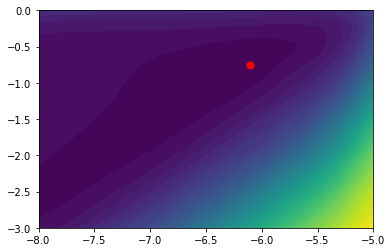

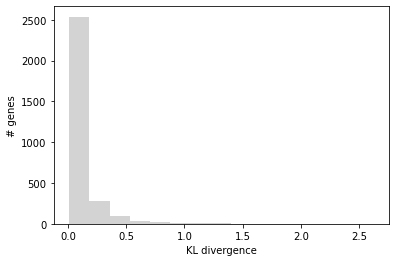

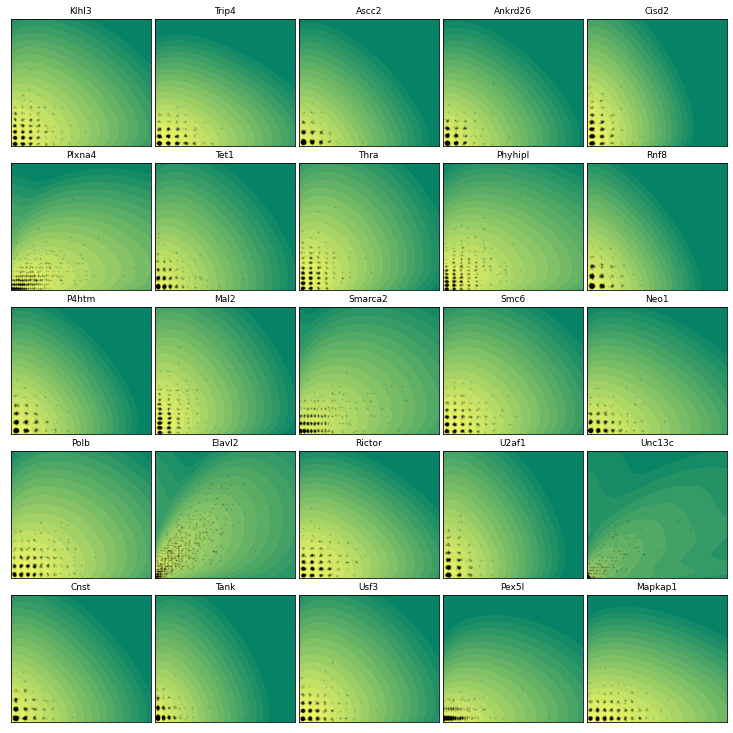

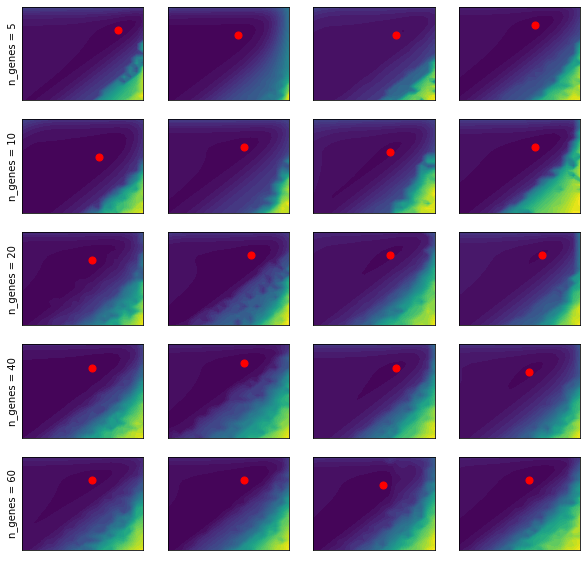

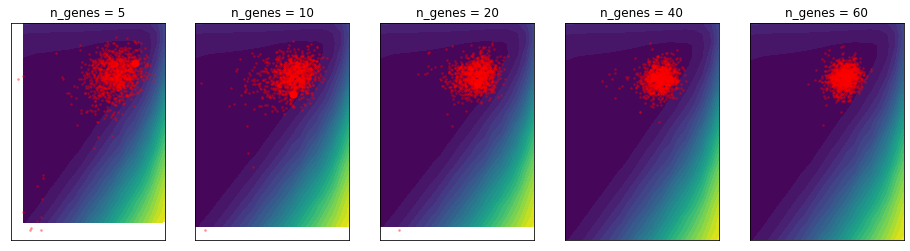

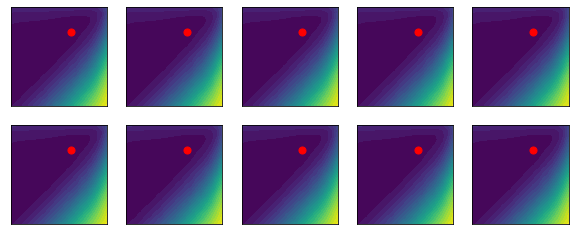

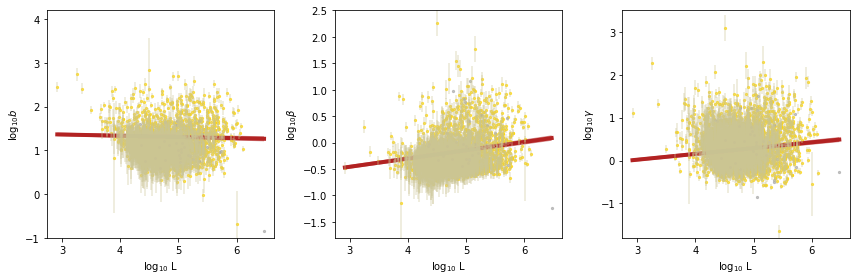

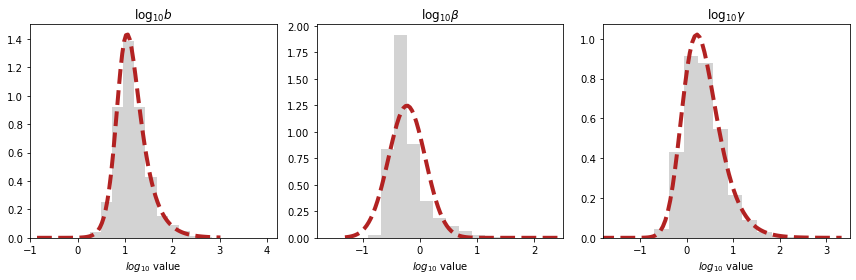

In [26]:
sr = load_search_results(result_strings[j])
sd = sd_arr[j]
fig1,ax1 = plt.subplots(1,1)
sr.find_sampling_optimum()
sr.plot_landscape(ax1)



fig1,ax1 = plt.subplots(1,1)
sr.plot_KL(ax1)

sr.plot_gene_distributions(sd,marg='joint')

_=sr.chisquare_testing(sd)
sr.resample_opt_viz()
sr.resample_opt_mc_viz()
sr.chisq_best_param_correction(sd,viz=True) 

sr.compute_sigma(sd,num_cores=50)
sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
sr.plot_param_marg()
sr.update_on_disk()
sr_arr.append(sr)

j+=1

In [13]:
sr_arr=[]
j=7

INFO:root:Grid scan results loaded from ./fits/gg_220527_021_allen_celltypes_1/allen_C01_glu/Bursty_Poisson_20x21/grid_scan_results.res.
INFO:root:No rejection statistics have been computed.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_C01_glu/Bursty_Poisson_20x21/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_C01_glu/Bursty_Poisson_20x21/analysis_figures/gene_distributions_joint.png.


/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


INFO:root:Chi-square computation complete. Rejected 147 genes out of 3000. Runtime: 3.4 seconds.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_C01_glu/Bursty_Poisson_20x21/analysis_figures/subsampling.png.
INFO:root:Figure stored to ./fits/gg_220527_021_allen_celltypes_1/allen_C01_glu/Bursty_Poisson_20x21/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -6.26, -0.90.
INFO:root:Chi-square computation complete. Rejected 147 genes out of 3000. Runtime: 3.1 seconds.
INFO:root:New optimum: -6.26, -0.90.
INFO:root:Chi-square computation complete. Rejected 147 genes out of 3000. Runtime: 3.0 seconds.
INFO:root:New optimum: -6.26, -0.90.
INFO:root:Chi-square computation complete. Rejected 147 genes out of 3000. Runtime: 3.0 seconds.
INFO:root:New optimum: -6.26, -0.90.
INFO:root:Chi-square computation complete. Rejected 147 genes out of 3000. Runtime: 3.0 seconds.
INFO:root:New optimum: -6.26, -0.90.
INFO:root:Chi-square computation complete. Re

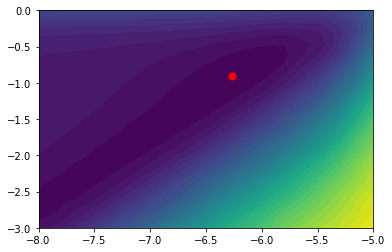

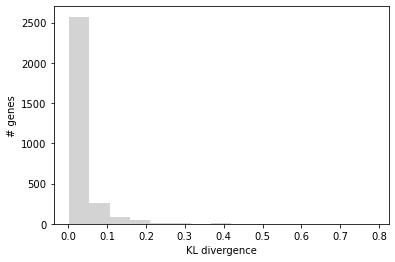

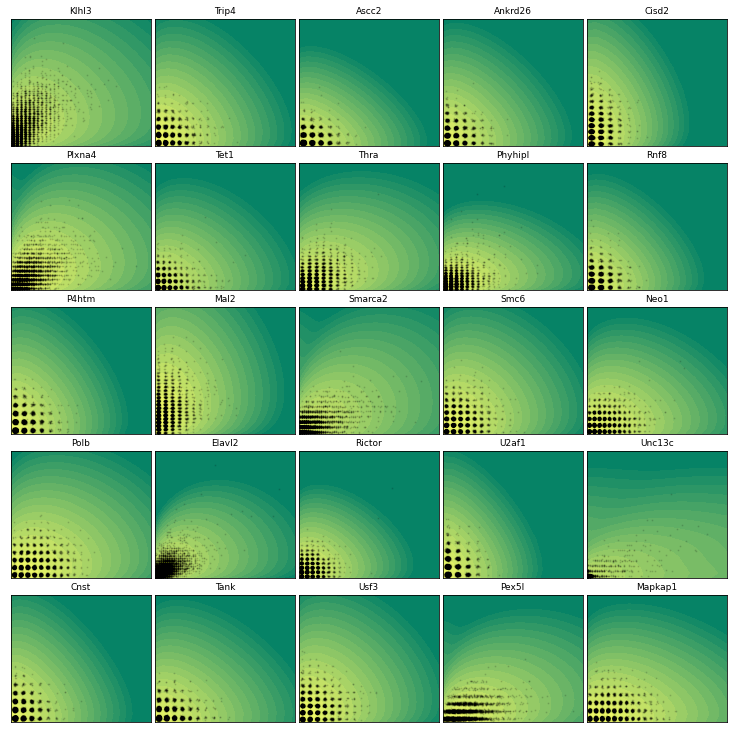

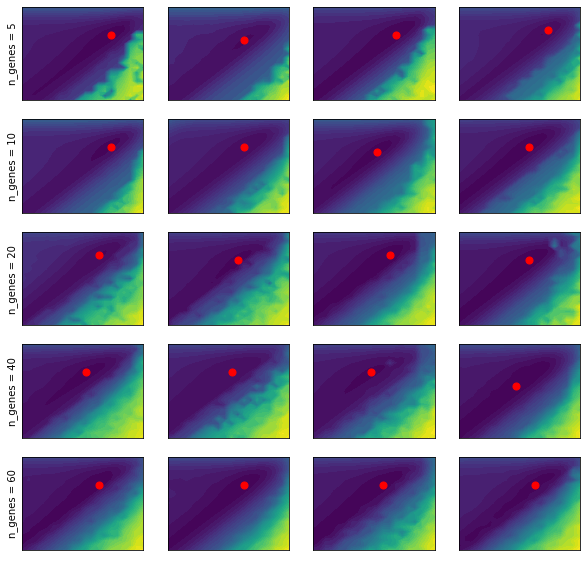

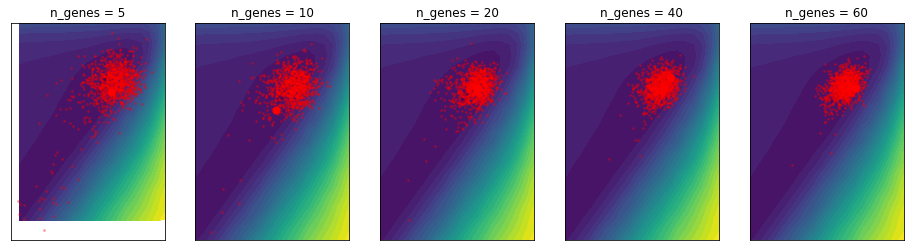

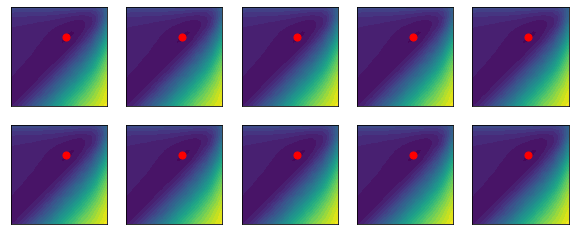

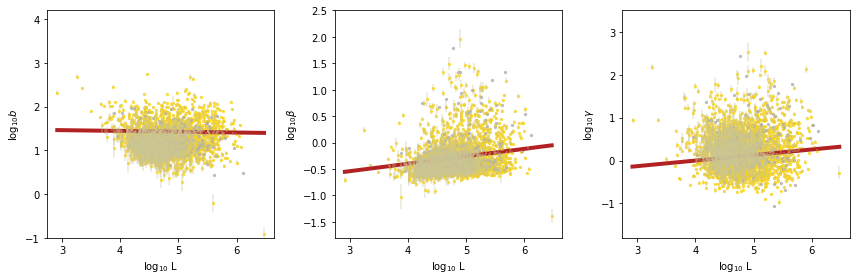

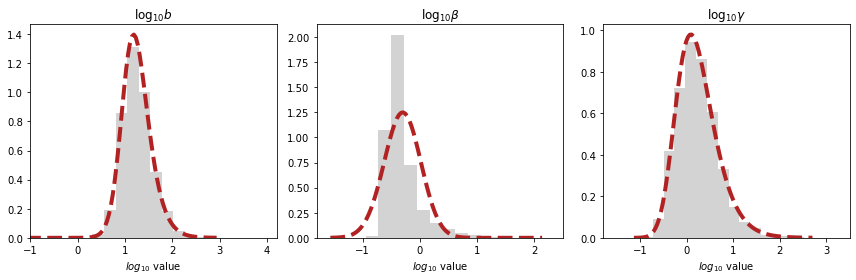

In [14]:
sr = load_search_results(result_strings[j])
sd = sd_arr[j]
fig1,ax1 = plt.subplots(1,1)
sr.find_sampling_optimum()
sr.plot_landscape(ax1)



fig1,ax1 = plt.subplots(1,1)
sr.plot_KL(ax1)

sr.plot_gene_distributions(sd,marg='joint')

_=sr.chisquare_testing(sd)
sr.resample_opt_viz()
sr.resample_opt_mc_viz()
sr.chisq_best_param_correction(sd,viz=True) 

sr.compute_sigma(sd,num_cores=50)
sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
sr.plot_param_marg()
sr.update_on_disk()
sr_arr.append(sr)
